In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [12]:
# Load dataset
data = pd.read_csv('/Users/shaneab/Projects/Machine Learning/Expression recognition/fer20131.csv')
X = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in data['pixels']])
y = data['emotion'].values


In [13]:
# Normalize pixel values
X = X / 255.0

In [14]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train


array([[6.15148020e-05, 6.15148020e-05, 6.15148020e-05, ...,
        4.61361015e-05, 4.61361015e-05, 4.61361015e-05],
       [4.61361015e-04, 4.92118416e-04, 6.30526720e-04, ...,
        1.66089965e-03, 1.78392926e-03, 1.81468666e-03],
       [3.86005383e-03, 3.76778162e-03, 3.18339100e-03, ...,
        9.53479431e-04, 3.07574010e-05, 1.69165705e-04],
       ...,
       [1.49173395e-03, 1.43021915e-03, 9.38100730e-04, ...,
        1.26105344e-03, 1.63014225e-03, 2.49134948e-03],
       [3.90618993e-03, 3.50634371e-03, 3.32179931e-03, ...,
        2.92195309e-03, 3.35255671e-03, 3.44482891e-03],
       [1.83006536e-03, 1.55324875e-03, 2.76816609e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
# Train SVM
svm_model = SVC(kernel='rbf', C=2, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
svm_model


SVC(C=2, random_state=42)

In [16]:
y_pred = svm_model.predict(X_test)
y_pred

array([4, 3, 6, ..., 4, 6, 2])

In [17]:
# Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4618278071886319
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.29      0.35       985
           1       1.00      0.20      0.33       102
           2       0.43      0.29      0.35      1043
           3       0.50      0.71      0.59      1765
           4       0.35      0.39      0.37      1210
           5       0.67      0.53      0.59       795
           6       0.43      0.43      0.43      1278

    accuracy                           0.46      7178
   macro avg       0.54      0.41      0.43      7178
weighted avg       0.47      0.46      0.45      7178



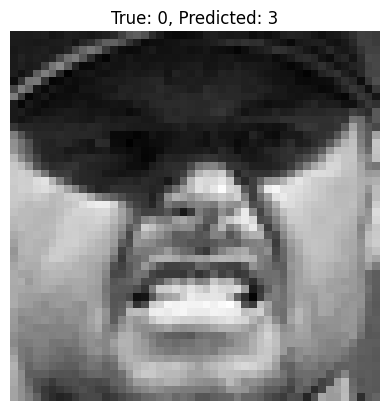

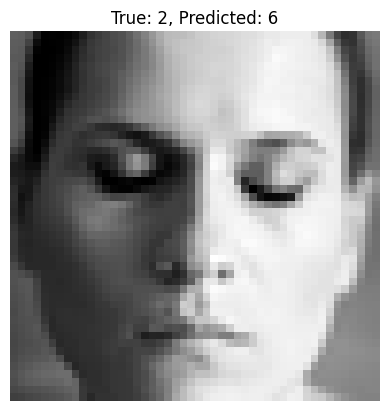

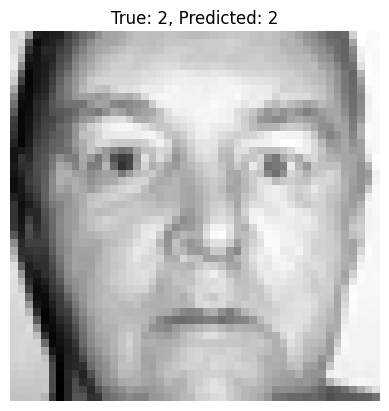

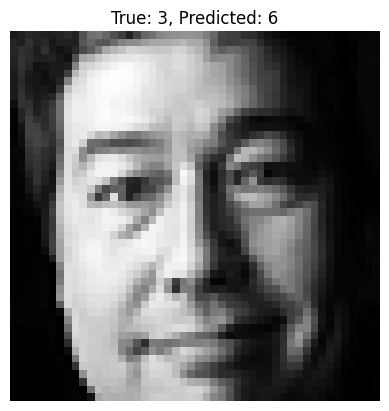

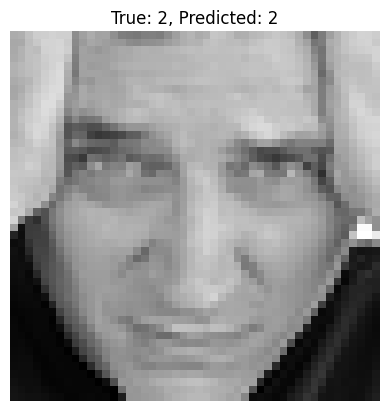

In [18]:
# Visualize random predictions
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    image = X_test[idx].reshape(48, 48)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
    plt.show()